In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

from segmentation_utils import make_mask, find_sidewalk_contours,points_to_calc_distance,separate_sides,average_point

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
c:\Users\Kevin\miniconda3\Lib\site-packages\transformers\models\segformer\image_processing_segformer.py:102: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


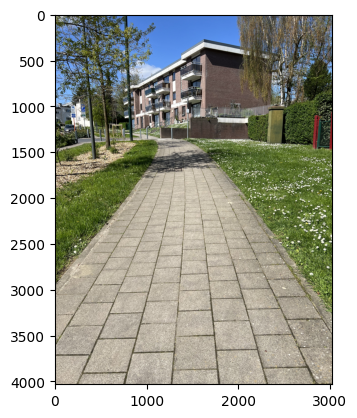

In [2]:
# Load model directly
from transformers import AutoImageProcessor, SegformerForSemanticSegmentation
from PIL import Image

processor = AutoImageProcessor.from_pretrained("nickmuchi/segformer-b4-finetuned-segments-sidewalk")
model = SegformerForSemanticSegmentation.from_pretrained("nickmuchi/segformer-b4-finetuned-segments-sidewalk")

image_path = 'C:/Users/Kevin/Desktop/Thesis/ThesisCode/DepthSensing/metric_depth/my_test/input/175/IMG_5155.jpeg'
image = Image.open(image_path).convert("RGB")
if image.height < image.width: # if image is horizontal, make it vertical
        image = image.rotate(-90, Image.NEAREST, expand = 1)

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits.squeeze().detach().cpu().numpy()
list(logits.shape)
                
plt.imshow(image)

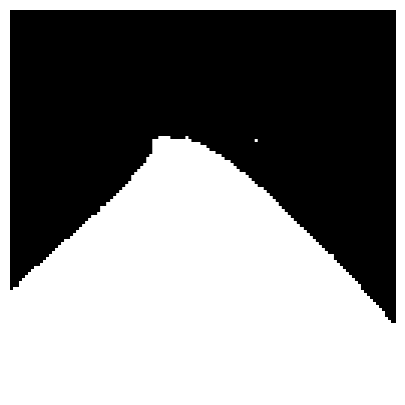

In [3]:
make_mask(model,logits)
img = Image.open('C:/Users/Kevin/Desktop/Thesis/ThesisCode/DepthSensing/metric_depth/SidewalkSegmentation/sidewalk_mask.png')
plt.imshow(img)
plt.show()

(98, 192)
(265, 192)
(98, 192)
(265, 192)


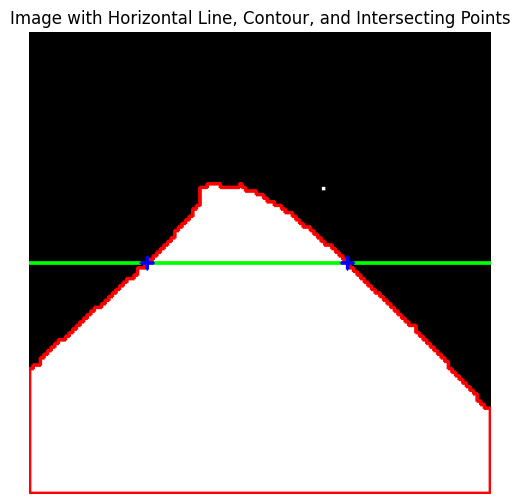

In [4]:
# Read the image
image = cv.imread('sidewalk_mask.png')

largest_contour = find_sidewalk_contours(image)

intersecting_points = points_to_calc_distance(image,largest_contour)
    
side1, side2 = separate_sides(intersecting_points,20)

average_side1 = average_point(side1)
average_side2 = average_point(side2)

print(average_side1)
print(average_side2)

# Draw the contour on the image
cv.drawContours(image, [largest_contour], -1, (0, 0, 255), 2)

# Draw the intersecting points on the image
for point in [average_side1,average_side2]:
    print(point)
    cv.drawMarker(image, point, color=(255, 0, 0), markerType=cv.MARKER_CROSS, markerSize=10, thickness=2)

# Plot the image with the horizontal line, contour, and intersecting points
plt.figure(figsize=(8, 6))
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Image with Horizontal Line, Contour, and Intersecting Points')
plt.axis('off')
plt.show()